In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from matplotlib.patches import Rectangle
from imageio import imread
from skimage.transform import resize
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.losses import binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy

In [ ]:
vgg =tf.keras.applications.VGG16(
    input_shape=[100,100,3], include_top=False, weights='imagenet'
)

58889256/58889256 [==============================] - 3s 0us/step


# Head of NN

In [ ]:
x = Flatten()(vgg.output)
x = Dense(4, activation='sigmoid')(x)
model = Model(vgg.input, x)

In [ ]:
def image_generator(batch_size=64):
  #generate image and targets
  while True:
    #each epoch will have 50 batches
    for _ in range(50):
      x = np.zeros((batch_size, 100,100,3))
      y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        #make the boxes and store their location in target
        row0 = np.random.randint(90)
        col0 = np.random.randint(90)
        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)
        #x[batch_size, height, width, all(color dimension)] is equal to 1
        x[i,row0:row1, col0:col1,:] = 1
        y[i,0] = row0/100.
        y[i,1] = col0/100.
        y[i,2] = (row1 - row0)/100.
        y[i,3] = (col1-col0)/100.

      yield x, y

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

In [ ]:
model.fit(
    image_generator(),
    steps_per_epoch=50,
    epochs=5
)

Epoch 1/5
50/50 [==============================] - 3s 60ms/step - loss: 0.5078
Epoch 2/5
50/50 [==============================] - 3s 59ms/step - loss: 0.5057
Epoch 3/5
50/50 [==============================] - 3s 59ms/step - loss: 0.5088
Epoch 4/5
50/50 [==============================] - 3s 59ms/step - loss: 0.5041
Epoch 5/5
50/50 [==============================] - 3s 59ms/step - loss: 0.5068


In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
#make predictions
def make_prediction():

  #generate a random image
  x = np.zeros((100,100,3))
  row0 = np.random.randint(90)
  col0 = np.random.randint(90)
  row1 = np.random.randint(row0, 100)
  col1 = np.random.randint(col0, 100)
  x[row0:row1,col0:col1,:] = 1
  print(row0,col0,row1,col1)

  #predict
  X = np.expand_dims(x,0)
  print("original: ", x.shape)
  print("Transformed " ,X.shape)
  p = model.predict(X)[0]
  print(p*100)
  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle(
      (p[1]*100, p[0]*100), #(x,y) = p[1] = x, p[0] = y
      p[3]*100, p[2]*100, #(width, height) p[3] = width p[4] = height
      linewidth=1, edgecolor='r', facecolor='none'
  )
  ax.add_patch(rect)
  plt.show

47 74 86 97
original:  (100, 100, 3)
Transformed  (1, 100, 100, 3)
1/1 [==============================] - 0s 19ms/step
[48.70216  72.87899  33.82646  21.483423]


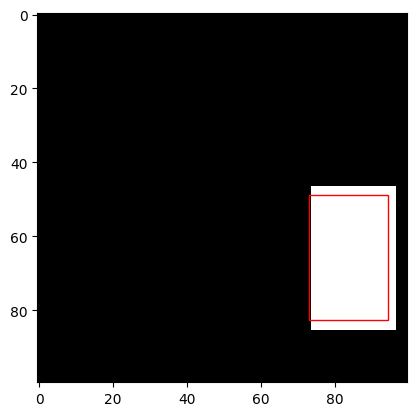

In [ ]:
make_prediction()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/charmander-tight.png

--2023-09-23 14:14:24--  https://lazyprogrammer.me/course_files/charmander-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-09-23 14:14:24 ERROR 403: Forbidden.



In [ ]:
!ls

backgrounds  charmander-tight.png  sample_data


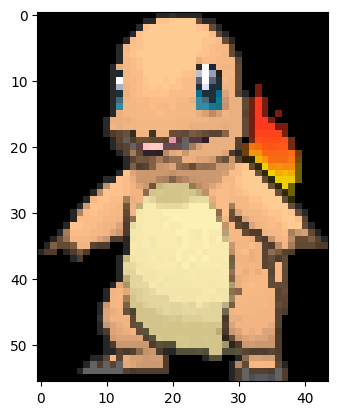

In [ ]:
ch = image.load_img("charmander-tight.png")
plt.imshow(ch)
plt.show()

In [ ]:
np.array(ch).shape

(56, 44, 3)

In [ ]:
from imageio import imread

In [ ]:
ch = imread("charmander-tight.png")

<ipython-input-9-4875a2edd1dd>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ch = imread("charmander-tight.png")


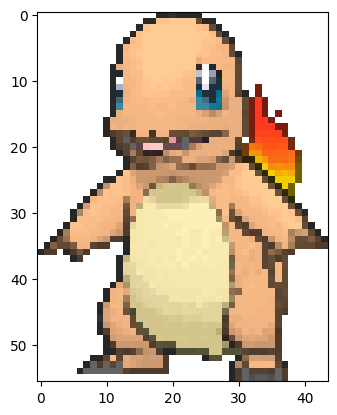

In [ ]:
plt.imshow(ch)

In [ ]:
type(ch)

numpy.ndarray

In [ ]:
ch.shape

(56, 44, 4)

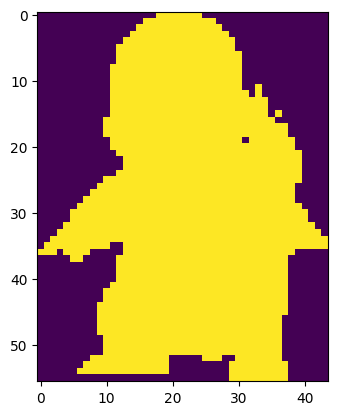

In [ ]:
plt.imshow(ch[:,:,3])
plt.show()

In [ ]:
POKE_DIM = 200
ch = np.array(ch)
CH_H, CH_W, _ = ch.shape

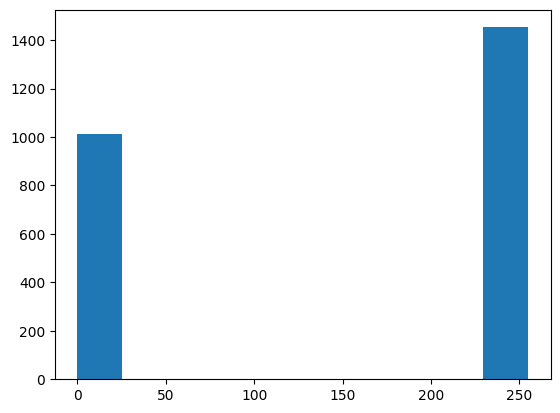

{0, 255}

In [ ]:
plt.hist(ch[:,:,3].flatten()) # in position 3 is alpha=transparent
plt.show()
set(ch[:,:,3].flatten())

In [ ]:
#%config InteractiveShell.show_signature=False

In [ ]:
POKE_DIM = 200
ch = np.array(ch)
CH_H, CH_W, _ = ch.shape

def pokemon_generator(batch_size=64):
  #generate image and targets
  while True:
    #Each epoch will have 50 batches
    for _ in range(50):
      X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
      Y = np.zeros((batch_size,4))

      for i in range(batch_size):

        row0 = np.random.randint(POKE_DIM - CH_H)
        col0 = np.random.randint(POKE_DIM - CH_W)
        row1 = row0 + CH_H
        col1 = col0 +CH_W
        X[i, row0:row1,col0:col1,:] = ch[:,:,:3]
        Y[i,0] = row0/POKE_DIM #y
        Y[i,1] = col0/POKE_DIM #x

        Y[i,2] = (row1 - row0)/POKE_DIM #height
        Y[i,3] = (col1 - col0)/POKE_DIM #width

      yield X / 255., Y

In [ ]:
def make_model():
  vgg = tf.keras.applications.VGG16(
      input_shape=[POKE_DIM, POKE_DIM, 3],
      include_top=False,
      weights='imagenet'
  )
  x = Flatten()(vgg.output)
  x = Dense(4,activation='sigmoid')(x)
  model = Model(vgg.input, x)

  model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.01, momentum=0.9))
  return model

In [ ]:
model = make_model()
model.fit(
    pokemon_generator(),
    steps_per_epoch=50,
    epochs=10
)

58889256/58889256 [==============================] - 2s 0us/step


Epoch 1/10
50/50 [==============================] - 25s 201ms/step - loss: 0.5778
Epoch 2/10
50/50 [==============================] - 10s 201ms/step - loss: 0.5532
Epoch 3/10
50/50 [==============================] - 10s 201ms/step - loss: 0.5559
Epoch 4/10
50/50 [==============================] - 10s 201ms/step - loss: 0.5541
Epoch 5/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5542
Epoch 6/10
50/50 [==============================] - 10s 201ms/step - loss: 0.5527
Epoch 7/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5529
Epoch 8/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5524
Epoch 9/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5520
Epoch 10/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5550


In [ ]:
def pokemon_prediction():
  #Generate a random image
  x = np.zeros((POKE_DIM, POKE_DIM, 3))
  row0 = np.random.randint(POKE_DIM-CH_H)
  col0 = np.random.randint(POKE_DIM - CH_W)
  row1 = row0+CH_H
  col1 = col0 + CH_W
  x[row0:row1,col0:col1,:] = ch[:,:,:3]
  print("true: ", row0, col0, row1, col1)

  # Predict
  X = np.expand_dims(x,0) / 255.
  p = model.predict(X)[0]

  #Calculate target /loss
  y = np.zeros(4)
  y[0] = row0/POKE_DIM
  y[1] = col0/POKE_DIM
  y[2] = (row1 - row0)/POKE_DIM
  y[3] = (col1 - col0)/POKE_DIM

  # Draw the box
  row0 = int(p[0]*POKE_DIM)
  col0 = int(p[1]*POKE_DIM)
  row1 = int(row0+p[2]*POKE_DIM)
  col1 = int(col0 + p[3]*POKE_DIM)

  print("pred:", row0, col0, row1, col1)
  print("loss:", -np.mean(y *np.log(p) + (1-y)*np.log(1-p)))

  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle(
      (p[1]*POKE_DIM, p[0]*POKE_DIM),
      p[3]*POKE_DIM, p[2]*POKE_DIM, linewidth=1, edgecolor='r', facecolor='none'
  )
  ax.add_patch(rect)
  plt.show()

true:  60 54 116 98
1/1 [==============================] - 0s 18ms/step
pred: 58 54 114 98
loss: 0.5785131583362818


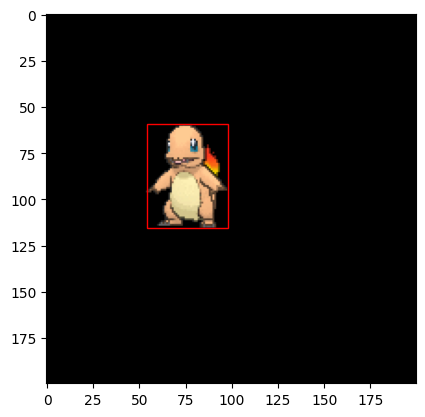

In [ ]:
pokemon_prediction()

In [ ]:
from skimage.transform import resize

In [ ]:
def pokemon_generator_with_resize(batch_size=64):
  #generate image and targets
  while True:
    #EAch epoch will have 50 batches
    for _ in range(50):
      X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        scale = 0.5 + np.random.random() #[0.5,1.5]
        new_height = int(CH_H* scale)
        new_width = int(CH_W * scale)
        obj = resize(
            ch,
            (new_height, new_width),
            preserve_range=True
        ).astype(np.uint8)

        # choose location and store in target
        row0 = np.random.randint(POKE_DIM - new_height)
        col0 = np.random.randint(POKE_DIM - new_width)
        row1 = row0 + new_height
        col1 = col0 + new_width
        X[i, row0:row1, col0:col1,:] = obj[:,:,:3]
        Y[i,0] = row0/POKE_DIM
        Y[i,1] = col0/POKE_DIM

        #later make the pokemon different sizes
        Y[i,2] = (row1 - row0)/POKE_DIM
        Y[i,3] = (col1 - col0)/POKE_DIM

      yield X/255., Y

In [ ]:
def make_model2():
  vgg = tf.keras.applications.VGG16(
      input_shape=[POKE_DIM,POKE_DIM, 3],
      include_top = False,
      weights='imagenet'
  )

  x = Flatten()(vgg.output)
  x = Dense(4, activation='sigmoid')(x)
  model = Model(vgg.input, x)

  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001))
  return model

In [ ]:
model = make_model2()
model.fit(
    pokemon_generator_with_resize(),
    steps_per_epoch=50,
    epochs = 10
)

Epoch 1/10
50/50 [==============================] - 14s 201ms/step - loss: 0.5564
Epoch 2/10
50/50 [==============================] - 10s 201ms/step - loss: 0.5450
Epoch 3/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5443
Epoch 4/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5437
Epoch 5/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5416
Epoch 6/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5447
Epoch 7/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5449
Epoch 8/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5441
Epoch 9/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5428
Epoch 10/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5460


In [ ]:
POKE_DIM = 200
ch = np.array(ch)
CH_H, CH_W, _ = ch.shape

In [ ]:
def pokemon_prediction_with_resize():

  scale = 0.5 + np.random.random()
  new_height = int(CH_H*scale)
  new_width = int(CH_W*scale)
  obj = resize(
      ch,
      (new_height, new_width),
      preserve_range=True
  ).astype(np.uint8)

  #Generate a random image
  x = np.zeros((POKE_DIM, POKE_DIM, 3))
  row0 = np.random.randint(POKE_DIM - new_height)
  col0 = np.random.randint(POKE_DIM - new_width)
  row1 = row0 + new_height
  col1 = col0 + new_width
  x[row0:row1, col0:col1, :] = obj[:,:,:3]
  print("True :", row0, col0, row1, col1)

  #predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0]

  #Draw the box
  row0 = int(p[0]*POKE_DIM)
  col0 = int(p[1]*POKE_DIM)
  row1 = int(row0 + p[2]*POKE_DIM)
  col1 = int(col0 + p[3]*POKE_DIM)
  print("pred: ", row0, col0, row1, col1)

  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle(
      (p[1]*POKE_DIM, p[0]*POKE_DIM),
      p[3]*POKE_DIM, p[2]*POKE_DIM, linewidth=1, edgecolor='r', facecolor='none'
  )
  ax.add_patch(rect)
  plt.show()

True : 5 1 76 57
1/1 [==============================] - 0s 18ms/step
pred:  4 1 79 58


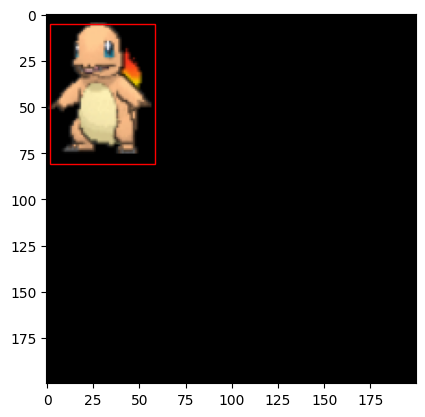

In [ ]:
pokemon_prediction_with_resize()

In [ ]:
from skimage.transform import rotate

In [ ]:
def pokemon_generator_with_resize_and_flip(batch_size=64):
  #generate image and targets
  while True:
    #EAch epoch will have 50 batches
    for _ in range(50):
      X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        scale = 0.5 + np.random.random() #[0.5,1.5]
        new_height = int(CH_H* scale)
        new_width = int(CH_W * scale)
        obj = resize(
            ch,
            (new_height, new_width),
            preserve_range=True
        ).astype(np.uint8)

        # choose location and store in target
        row0 = np.random.randint(POKE_DIM - new_height)
        col0 = np.random.randint(POKE_DIM - new_width)
        row1 = row0 + new_height
        col1 = col0 + new_width

        #maybe flip
        if np.random.random() < 0.5:
          obj = np.fliplr(obj)
        else:
          obj = obj

        X[i, row0:row1, col0:col1,:] = obj[:,:,:3]
        Y[i,0] = row0/POKE_DIM
        Y[i,1] = col0/POKE_DIM

        #later make the pokemon different sizes
        Y[i,2] = (row1 - row0)/POKE_DIM
        Y[i,3] = (col1 - col0)/POKE_DIM

      yield X/255., Y

In [ ]:
model = make_model2()
model.fit(
    pokemon_generator_with_resize_and_flip(),
    steps_per_epoch=50,
    epochs = 10
)

Epoch 1/10
50/50 [==============================] - 14s 202ms/step - loss: 0.5541
Epoch 2/10
50/50 [==============================] - 10s 201ms/step - loss: 0.5437
Epoch 3/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5429
Epoch 4/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5409
Epoch 5/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5435
Epoch 6/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5422
Epoch 7/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5425
Epoch 8/10
50/50 [==============================] - 10s 203ms/step - loss: 0.5431
Epoch 9/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5463
Epoch 10/10
50/50 [==============================] - 10s 202ms/step - loss: 0.5438


In [ ]:
def pokemon_prediction_with_resize_and_flip():

  scale = 0.5 + np.random.random()
  new_height = int(CH_H*scale)
  new_width = int(CH_W*scale)
  obj = resize(
      ch,
      (new_height, new_width),
      preserve_range=True
  ).astype(np.uint8)

  #Generate a random image
  x = np.zeros((POKE_DIM, POKE_DIM, 3))
  row0 = np.random.randint(POKE_DIM - new_height)
  col0 = np.random.randint(POKE_DIM - new_width)
  row1 = row0 + new_height
  col1 = col0 + new_width

  #maybe flip
  if np.random.random() < 0.5:
    obj = np.fliplr(obj)
  else:
    obj = obj

  x[row0:row1, col0:col1, :] = obj[:,:,:3]
  print("True :", row0, col0, row1, col1)

  #predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0]

  #Draw the box
  row0 = int(p[0]*POKE_DIM)
  col0 = int(p[1]*POKE_DIM)
  row1 = int(row0 + p[2]*POKE_DIM)
  col1 = int(col0 + p[3]*POKE_DIM)
  print("pred: ", row0, col0, row1, col1)

  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle(
      (p[1]*POKE_DIM, p[0]*POKE_DIM),
      p[3]*POKE_DIM, p[2]*POKE_DIM, linewidth=1, edgecolor='r', facecolor='none'
  )
  ax.add_patch(rect)
  plt.show()

True : 115 34 190 92
1/1 [==============================] - 0s 19ms/step
pred:  115 34 190 92


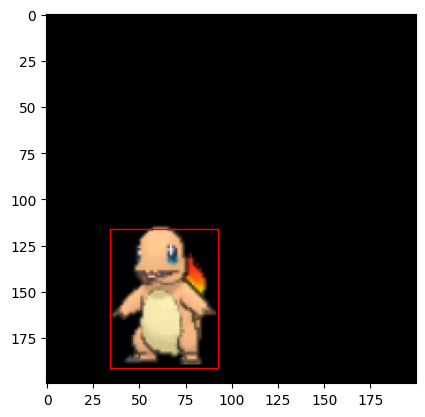

In [ ]:
pokemon_prediction_with_resize_and_flip()

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/backgrounds.zip

--2023-09-22 12:21:59--  https://lazyprogrammer.me/course_files/backgrounds.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494000 (482K) [application/zip]
Saving to: ‘backgrounds.zip’

backgrounds.zip     100%[===================>] 482.42K  --.-KB/s    in 0.03s   

2023-09-22 12:22:00 (15.7 MB/s) - ‘backgrounds.zip’ saved [494000/494000]



In [ ]:
!unzip backgrounds.zip

Archive:  backgrounds.zip
   creating: backgrounds/
  inflating: backgrounds/8.jpg       
   creating: __MACOSX/
   creating: __MACOSX/backgrounds/
  inflating: __MACOSX/backgrounds/._8.jpg  
  inflating: backgrounds/9.jpg       
  inflating: __MACOSX/backgrounds/._9.jpg  
  inflating: backgrounds/14.jpg      
  inflating: __MACOSX/backgrounds/._14.jpg  
  inflating: backgrounds/15.jpg      
  inflating: __MACOSX/backgrounds/._15.jpg  
  inflating: backgrounds/12.jpg      
  inflating: __MACOSX/backgrounds/._12.jpg  
  inflating: backgrounds/13.jpg      
  inflating: __MACOSX/backgrounds/._13.jpg  
  inflating: backgrounds/11.jpg      
  inflating: __MACOSX/backgrounds/._11.jpg  
  inflating: backgrounds/10.jpg      
  inflating: __MACOSX/backgrounds/._10.jpg  
  inflating: backgrounds/4.jpg       
  inflating: __MACOSX/backgrounds/._4.jpg  
  inflating: backgrounds/5.jpg       
  inflating: __MACOSX/backgrounds/._5.jpg  
  inflating: backgrounds/7.jpg       
  inflating: __MACOSX/back

In [ ]:
from glob import glob
backgrounds = []

background_files = glob("backgrounds/*.jpg")
for f in background_files:
  bg = np.array(image.load_img(f))
  backgrounds.append(bg)

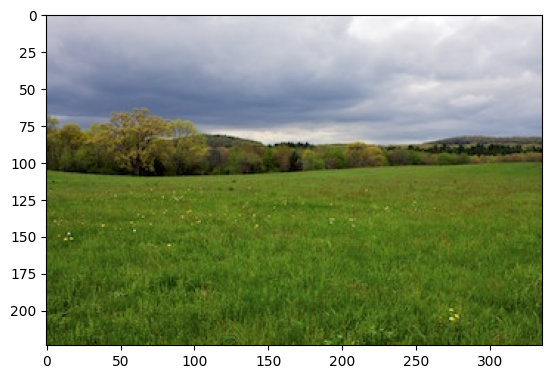

In [ ]:
plt.imshow(backgrounds[5])

In [ ]:
t = backgrounds[5]

In [ ]:
t.shape[1]

336

In [ ]:
possible = np.zeros((200, 200, 3))

In [ ]:
height = np.random.randint(224-200)

In [ ]:
width = np.random.randint(t.shape[1]-200)

In [ ]:
possible = t[height:height+POKE_DIM, width:width+POKE_DIM].copy()

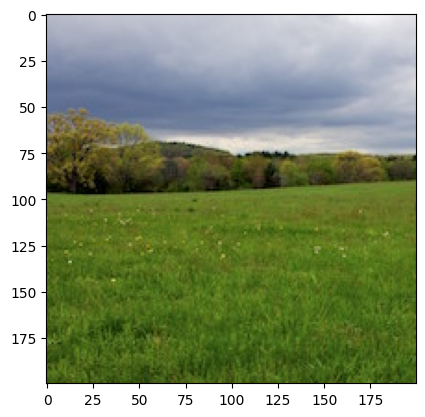

In [ ]:
plt.imshow(possible)

In [ ]:
from skimage.transform import resize

In [ ]:
def pokemon_generator_bg(batch_size=64):
  #generate image and targets
  while True:
    #EAch epoch will have 50 batches
    for _ in range(50):
      X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        #select a random background
        bg_idx = np.random.choice(len(backgrounds)) #random number
        bg = backgrounds[bg_idx] #random picture
        bg_h, bg_w, _ = bg.shape
        rnd_h = np.random.randint(bg_h - POKE_DIM)
        rnd_w = np.random.randint(bg_w - POKE_DIM)
        X[i] = bg[rnd_h: rnd_h + POKE_DIM, rnd_w:rnd_w+POKE_DIM].copy()

        #resizing
        scale = 0.5 + np.random.random() #[0.5,1.5]
        new_height = int(CH_H* scale)
        new_width = int(CH_W * scale)
        obj = resize(
            ch,
            (new_height, new_width),
            preserve_range=True
        ).astype(np.uint8)

        #maybe flip
        if np.random.random() < 0.5:
          obj = np.fliplr(obj)
        else:
          obj = obj

        # choose location and store in target
        row0 = np.random.randint(POKE_DIM - new_height)
        col0 = np.random.randint(POKE_DIM - new_width)
        row1 = row0 + new_height
        col1 = col0 + new_width

        mask = (obj[:,:,3] == 0) #find where the pokemon is 0 in the alpha layer

        ''' section of the backgroundwhere we will like to place the object'''
        bg_slice = X[i,row0:row1, col0:col1,:]
        bg_slice = np.expand_dims(mask, -1) * bg_slice #(h,w,1) * (h,w,3)
        bg_slice +=obj[:,:,:3] # add the pokemon to the slice

        X[i, row0:row1, col0:col1,:] = bg_slice



        Y[i,0] = row0/POKE_DIM
        Y[i,1] = col0/POKE_DIM

        #later makes the pokemon different sizes
        Y[i,2] = (row1 - row0)/POKE_DIM
        Y[i,3] = (col1 - col0)/POKE_DIM

      yield X/255., Y

In [ ]:
xx = None
yy = None
for x,y, in pokemon_generator_bg():
  xx, yy = x,y
  break

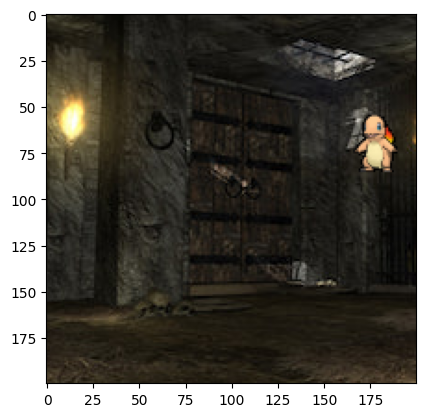

In [ ]:
plt.imshow(xx[20])

In [ ]:
model = make_model2()
model.fit(
    pokemon_generator_bg(),
    steps_per_epoch=50,
    epochs=5
)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
50/50 [==============================] - 29s 204ms/step - loss: 0.5640
Epoch 2/5
50/50 [==============================] - 10s 204ms/step - loss: 0.5433
Epoch 3/5
50/50 [==============================] - 10s 204ms/step - loss: 0.5440
Epoch 4/5
50/50 [==============================] - 10s 204ms/step - loss: 0.5434
Epoch 5/5
50/50 [==============================] - 10s 204ms/step - loss: 0.5442


In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
def pokemon_prediction_bg():

  #select a random background
  bg_idx = np.random.choice(len(backgrounds)) #random number
  bg = backgrounds[bg_idx] #random picture
  bg_h, bg_w, _ = bg.shape
  rnd_h = np.random.randint(bg_h - POKE_DIM)
  rnd_w = np.random.randint(bg_w - POKE_DIM)
  x = bg[rnd_h: rnd_h + POKE_DIM, rnd_w:rnd_w+POKE_DIM].copy()

  scale = 0.5 + np.random.random()
  new_height = int(CH_H*scale)
  new_width = int(CH_W*scale)
  obj = resize(
      ch,
      (new_height, new_width),
      preserve_range=True
  ).astype(np.uint8)

  #Generate a random image
  row0 = np.random.randint(POKE_DIM - new_height)
  col0 = np.random.randint(POKE_DIM - new_width)
  row1 = row0 + new_height
  col1 = col0 + new_width

  #maybe flip
  if np.random.random() < 0.5:
    obj = np.fliplr(obj)
  else:
    obj = obj

  mask = (obj[:,:,3] == 0) #find where the pokemon is 0 in the alpha layer

  ''' section of the backgroundwhere we will like to place the object'''
  bg_slice = x[row0:row1, col0:col1,:]
  bg_slice = np.expand_dims(mask, -1) * bg_slice #(h,w,1) * (h,w,3)
  bg_slice +=obj[:,:,:3] # add the pokemon to the slice

  x[row0:row1, col0:col1,:] = bg_slice

  print("True :", row0, col0, row1, col1)

  #predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0]

  #Draw the box
  row0 = int(p[0]*POKE_DIM)
  col0 = int(p[1]*POKE_DIM)
  row1 = int(row0 + p[2]*POKE_DIM)
  col1 = int(col0 + p[3]*POKE_DIM)
  print("pred: ", row0, col0, row1, col1)

  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle(
      (p[1]*POKE_DIM, p[0]*POKE_DIM),
      p[3]*POKE_DIM, p[2]*POKE_DIM, linewidth=1, edgecolor='r', facecolor='none'
  )
  ax.add_patch(rect)
  plt.show()

True : 143 23 189 59
1/1 [==============================] - 0s 19ms/step
pred:  146 23 192 59


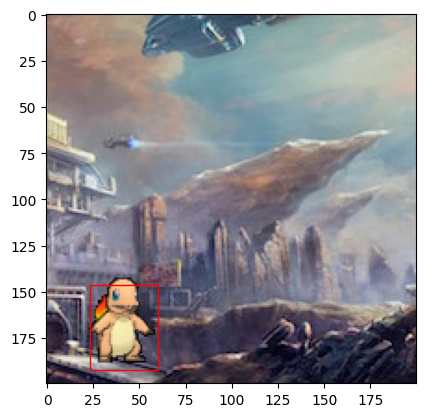

In [ ]:
pokemon_prediction_bg()

True : 70 97 143 154
1/1 [==============================] - 0s 18ms/step
pred:  69 97 146 156


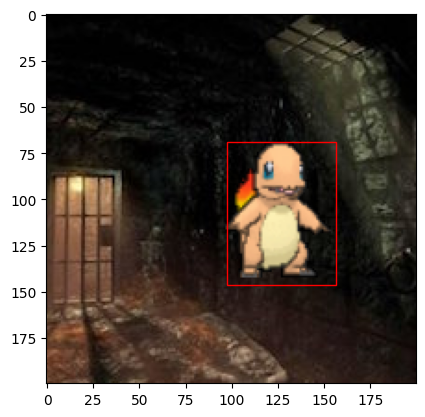

In [ ]:
pokemon_prediction_bg()

True : 35 14 79 49
1/1 [==============================] - 0s 18ms/step
pred:  33 13 79 47


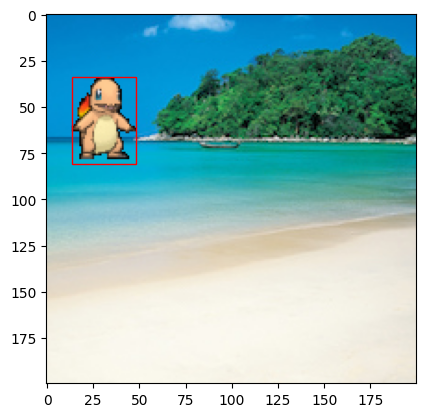

In [ ]:
pokemon_prediction_bg()

True : 24 20 68 55
1/1 [==============================] - 0s 18ms/step
pred:  26 21 72 57


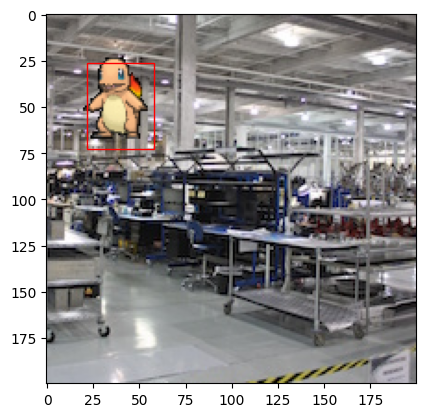

In [ ]:
pokemon_prediction_bg()

True : 154 87 193 117
1/1 [==============================] - 0s 24ms/step
pred:  158 86 197 116


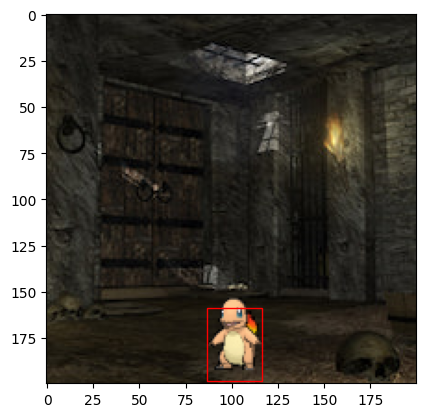

In [ ]:
pokemon_prediction_bg()

True : 34 105 76 138
1/1 [==============================] - 0s 18ms/step
pred:  32 108 74 142


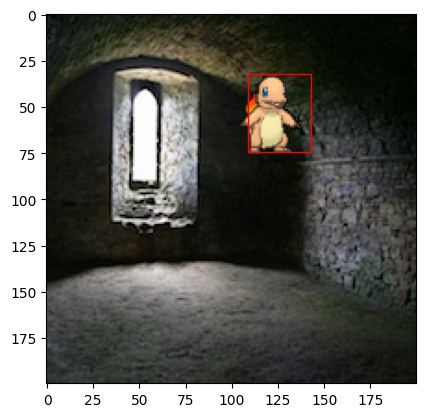

In [ ]:
pokemon_prediction_bg()

In [ ]:
POKE_DIM = 200
ch = np.array(ch)
CH_H, CH_W, CH_C = ch.shape

In [ ]:
def make_model2():
  vgg = tf.keras.applications.VGG16(
      input_shape=[POKE_DIM,POKE_DIM, 3],
      include_top = False,
      weights='imagenet'
  )

  x = Flatten()(vgg.output)
  x = Dense(4, activation='sigmoid')(x)
  model = Model(vgg.input, x)

  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001))
  return model

In [ ]:
def custom_loss(y_true, y_pred):
  #target is a 5-tuple
  # (row, col, depth, width, object_appeared)
  bce = binary_crossentropy(y_true[:,:-1], y_pred[:, :-1]) #bounding loss or square loss
  bce2 = binary_crossentropy(y_true[:, -1], y_pred[:,-1]) # binary loss object or no object
  return 1.5 *bce *y_true[:, -1] + 0.5 *bce2

In [ ]:
def make_model():
  vgg = tf.keras.applications.VGG16(
      input_shape=[POKE_DIM,POKE_DIM, 3],
      include_top = False,
      weights='imagenet'
  )

  x = Flatten()(vgg.output)
  x = Dense(5, activation='sigmoid')(x)
  model = Model(vgg.input, x)

  model.compile(loss=custom_loss, optimizer=Adam(learning_rate=0.0001))
  return model

In [ ]:
def pokemon_generator_bg(batch_size=64):
  #generate image and targets
  while True:
    #EAch epoch will have 50 batches
    for _ in range(50):
      X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
      Y = np.zeros((batch_size, 5))

      for i in range(batch_size):
        #select a random background
        bg_idx = np.random.choice(len(backgrounds)) #random number
        bg = backgrounds[bg_idx] #random picture
        bg_h, bg_w, _ = bg.shape
        rnd_h = np.random.randint(bg_h - POKE_DIM)
        rnd_w = np.random.randint(bg_w - POKE_DIM)
        X[i] = bg[rnd_h: rnd_h + POKE_DIM, rnd_w:rnd_w+POKE_DIM].copy()

        appear = (np.random.random() < 0.5)
        if appear:
          #resizing
          scale = 0.5 + np.random.random() #[0.5,1.5]
          new_height = int(CH_H* scale)
          new_width = int(CH_W * scale)
          obj = resize(
              ch,
              (new_height, new_width),
              preserve_range=True
          ).astype(np.uint8)

          #maybe flip
          if np.random.random() < 0.5:
            obj = np.fliplr(obj)
          else:
            obj = obj

          # choose location and store in target
          row0 = np.random.randint(POKE_DIM - new_height)
          col0 = np.random.randint(POKE_DIM - new_width)
          row1 = row0 + new_height
          col1 = col0 + new_width

          mask = (obj[:,:,3] == 0) #find where the pokemon is 0 in the alpha layer

          ''' section of the backgroundwhere we will like to place the object'''
          bg_slice = X[i,row0:row1, col0:col1,:]
          bg_slice = np.expand_dims(mask, -1) * bg_slice #(h,w,1) * (h,w,3)
          bg_slice +=obj[:,:,:3] # add the pokemon to the slice

          X[i, row0:row1, col0:col1,:] = bg_slice



          Y[i,0] = row0/POKE_DIM
          Y[i,1] = col0/POKE_DIM

          #later makes the pokemon different sizes
          Y[i,2] = (row1 - row0)/POKE_DIM
          Y[i,3] = (col1 - col0)/POKE_DIM

        Y[i,4] = appear

      yield X/255., Y

In [ ]:
xx = None
yy = None
for x,y, in pokemon_generator_bg():
  xx, yy = x,y
  break

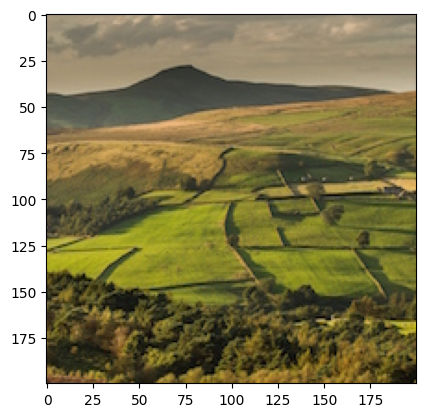

In [ ]:
plt.imshow(xx[2])

In [ ]:
model = make_model()
model.fit(
    pokemon_generator_bg(),
    steps_per_epoch=50,
    epochs=15
)

Epoch 1/15
50/50 [==============================] - 15s 209ms/step - loss: 0.5101
Epoch 2/15
50/50 [==============================] - 10s 208ms/step - loss: 0.4163
Epoch 3/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4152
Epoch 4/15
50/50 [==============================] - 10s 208ms/step - loss: 0.4189
Epoch 5/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4124
Epoch 6/15
50/50 [==============================] - 10s 208ms/step - loss: 0.3995
Epoch 7/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4019
Epoch 8/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4005
Epoch 9/15
50/50 [==============================] - 10s 208ms/step - loss: 0.3928
Epoch 10/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4163
Epoch 11/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4013
Epoch 12/15
50/50 [==============================] - 10s 209ms/step - loss: 0.3977
Epoch 13/15
5

In [ ]:
def pokemon_prediction_bg():

  #select a random background
  bg_idx = np.random.choice(len(backgrounds)) #random number
  bg = backgrounds[bg_idx] #random picture
  bg_h, bg_w, _ = bg.shape
  rnd_h = np.random.randint(bg_h - POKE_DIM)
  rnd_w = np.random.randint(bg_w - POKE_DIM)
  x = bg[rnd_h: rnd_h + POKE_DIM, rnd_w:rnd_w+POKE_DIM].copy()

  appear = (np.random.random() < 0.5)
  if appear:

    scale = 0.5 + np.random.random()
    new_height = int(CH_H*scale)
    new_width = int(CH_W*scale)
    obj = resize(
        ch,
        (new_height, new_width),
        preserve_range=True
    ).astype(np.uint8)

    #Generate a random image
    row0 = np.random.randint(POKE_DIM - new_height)
    col0 = np.random.randint(POKE_DIM - new_width)
    row1 = row0 + new_height
    col1 = col0 + new_width

    #maybe flip
    if np.random.random() < 0.5:
      obj = np.fliplr(obj)
    else:
      obj = obj

    mask = (obj[:,:,3] == 0) #find where the pokemon is 0 in the alpha layer

    ''' section of the backgroundwhere we will like to place the object'''
    bg_slice = x[row0:row1, col0:col1,:]
    bg_slice = np.expand_dims(mask, -1) * bg_slice #(h,w,1) * (h,w,3)
    bg_slice +=obj[:,:,:3] # add the pokemon to the slice

    x[row0:row1, col0:col1,:] = bg_slice

    print("True :", row0, col0, row1, col1)

  #predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0]

  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))

  #Draw the box
  if p[4] > 0.5:
    row0 = int(p[0]*POKE_DIM)
    col0 = int(p[1]*POKE_DIM)
    row1 = int(row0 + p[2]*POKE_DIM)
    col1 = int(col0 + p[3]*POKE_DIM)
    print("pred: ", row0, col0, row1, col1)

    rect = Rectangle(
        (p[1]*POKE_DIM, p[0]*POKE_DIM),
        p[3]*POKE_DIM, p[2]*POKE_DIM, linewidth=1, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)
  else:
    print("pred: no object")
  plt.show()

True : 101 52 173 108
1/1 [==============================] - 0s 21ms/step
pred:  100 48 170 104


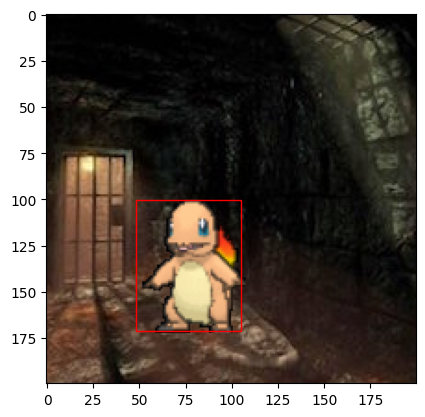

In [ ]:
pokemon_prediction_bg()

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/bulbasaur-tight.png
!wget -nc https://lazyprogrammer.me/course_files/squirtle-tight.png

--2023-09-23 14:32:43--  https://lazyprogrammer.me/course_files/bulbasaur-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-09-23 14:32:43 ERROR 403: Forbidden.

--2023-09-23 14:32:43--  https://lazyprogrammer.me/course_files/squirtle-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-09-23 14:32:43 ERROR 403: Forbidden.



<ipython-input-70-391b67800854>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ch = imread("charmander-tight.png")
<ipython-input-70-391b67800854>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bb = imread("bulbasaur-tight.png")
<ipython-input-70-391b67800854>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sq = imread("squirtle-tight.png")


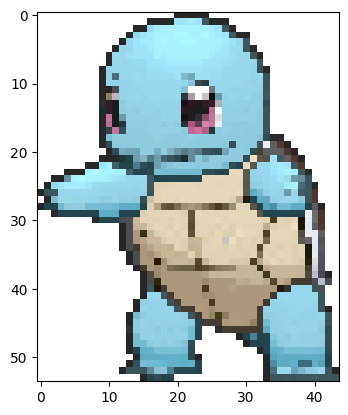

In [ ]:
ch = imread("charmander-tight.png")
bb = imread("bulbasaur-tight.png")
sq = imread("squirtle-tight.png")
plt.imshow(sq)

In [ ]:
POKEDIM = 200
ch = np.array(ch)
bb = np.array(bb)
sq = np.array(sq)

CH_H, CH_W, CH_C = ch.shape
BB_H, BB_W, BB_C = bb.shape
SQ_H, SQ_W, SQ_C = sq.shape

In [ ]:
poke_data = [
    [ch, CH_H, CH_W, CH_C],
    [bb, BB_H, BB_W, BB_C],
    [sq, SQ_H, SQ_W, SQ_C],
]

In [ ]:
class_names = ["Charmanger", "Bulbasaur", "Squirtle"]

In [ ]:
def custom_loss(y_true, y_pred):
  #target is a 8 tuple
  #(row, col, depth, width, class1, class2, class3, object_appeared)

  bce = binary_crossentropy(y_true[:,:4], y_pred[:,:4]) #location
  cce = categorical_crossentropy(y_true[:, 4:7], y_pred[:, 4:7]) #object class
  bce2 = binary_crossentropy(y_true[:, -1], y_pred[:, -1]) #object appeared

  return bce*y_true[:, -1] + cce *y_true[:,-1] +0.5*bce2

In [ ]:
def make_model():
  vgg = tf.keras.applications.VGG16(
      input_shape=[POKE_DIM, POKE_DIM, 3],
      include_top= False,
      weights='imagenet'
  )
  x = Flatten()(vgg.output)
  x1 = Dense(4, activation="sigmoid")(x) #location
  x2 = Dense(3, activation="softmax")(x) #object class
  x3 = Dense(1, activation="sigmoid")(x) #object appeared
  x = Concatenate()([x1,x2,x3])
  model = Model(vgg.input, x)

  model.compile(loss=custom_loss, optimizer=Adam(learning_rate=0.0001))
  return model

In [ ]:
def pokemon_generator_multiclass(batch_size=64):
  #generate image and targets
  while True:
    #EAch epoch will have 50 batches
    for _ in range(50):
      X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
      Y = np.zeros((batch_size, 8))

      for i in range(batch_size):
        #select a random background
        bg_idx = np.random.choice(len(backgrounds)) #random number
        bg = backgrounds[bg_idx] #random picture
        bg_h, bg_w, _ = bg.shape
        rnd_h = np.random.randint(bg_h - POKE_DIM)
        rnd_w = np.random.randint(bg_w - POKE_DIM)
        X[i] = bg[rnd_h: rnd_h + POKE_DIM, rnd_w:rnd_w+POKE_DIM].copy()

        appear = (np.random.random() < 0.75)
        if appear:

          #choose a pokemon
          pk_idx = np.random.randint(3)
          pk, h, w, _ = poke_data[pk_idx]

          #resizing
          scale = 0.5 + np.random.random() #[0.5,1.5]
          new_height = int(h* scale)
          new_width = int(w * scale)
          obj = resize(
              pk,
              (new_height, new_width),
              preserve_range=True
          ).astype(np.uint8)

          #maybe flip
          if np.random.random() < 0.5:
            obj = np.fliplr(obj)
          else:
            obj = obj

          # choose location and store in target
          row0 = np.random.randint(POKE_DIM - new_height)
          col0 = np.random.randint(POKE_DIM - new_width)
          row1 = row0 + new_height
          col1 = col0 + new_width

          mask = (obj[:,:,3] == 0) #find where the pokemon is 0 in the alpha layer

          ''' section of the backgroundwhere we will like to place the object'''
          bg_slice = X[i,row0:row1, col0:col1,:]
          bg_slice = np.expand_dims(mask, -1) * bg_slice #(h,w,1) * (h,w,3)
          bg_slice +=obj[:,:,:3] # add the pokemon to the slice

          X[i, row0:row1, col0:col1,:] = bg_slice


          #location
          Y[i,0] = row0/POKE_DIM
          Y[i,1] = col0/POKE_DIM
          Y[i,2] = (row1 - row0)/POKE_DIM
          Y[i,3] = (col1 - col0)/POKE_DIM

          #class
          Y[i,4+pk_idx] = 1 #true class or pokemon

        Y[i,7] = appear

      yield X/255., Y

In [ ]:
xx = None
yy = None
for x,y in pokemon_generator_multiclass():
  xx, yy = x,y
  break

[0.02 0.02 0.38 0.31 0.   0.   1.   1.  ]
percent no obj: 0.265625
percent charmander 0.15625
percent bulbasaur 0.1875
percent squirtle 0.390625


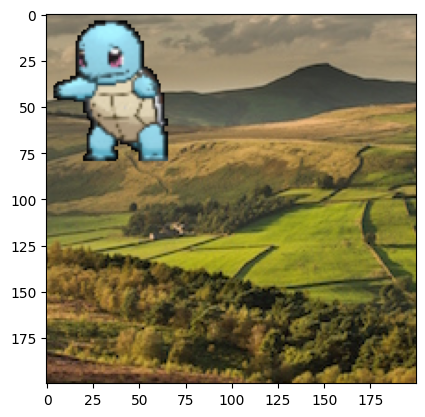

In [ ]:
n = yy.shape[0]
idx = np.random.randint(n)
plt.imshow(xx[idx]);
print(yy[idx])
print("percent no obj:", (yy[:,7]==0).sum() / n)
print("percent charmander", yy[:,4].sum() / n)
print("percent bulbasaur", yy[:,5].sum() / n)
print("percent squirtle", yy[:,6].sum() / n)

In [ ]:
model = make_model()
model.fit(
    pokemon_generator_multiclass(),
    steps_per_epoch=50,
    epochs= 15
)

Epoch 1/15
50/50 [==============================] - 16s 208ms/step - loss: 0.7961
Epoch 2/15
50/50 [==============================] - 10s 208ms/step - loss: 0.4209
Epoch 3/15
50/50 [==============================] - 10s 208ms/step - loss: 0.4125
Epoch 4/15
50/50 [==============================] - 10s 208ms/step - loss: 0.4083
Epoch 5/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4151
Epoch 6/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4090
Epoch 7/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4036
Epoch 8/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4074
Epoch 9/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4072
Epoch 10/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4089
Epoch 11/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4076
Epoch 12/15
50/50 [==============================] - 10s 209ms/step - loss: 0.4032
Epoch 13/15
5

In [ ]:
def pokemon_prediction_multiclass():

  #select a random background
  bg_idx = np.random.choice(len(backgrounds)) #random number
  bg = backgrounds[bg_idx] #random picture
  bg_h, bg_w, _ = bg.shape
  rnd_h = np.random.randint(bg_h - POKE_DIM)
  rnd_w = np.random.randint(bg_w - POKE_DIM)
  x = bg[rnd_h: rnd_h + POKE_DIM, rnd_w:rnd_w+POKE_DIM].copy()

  appear = (np.random.random() < 0.75)
  if appear:

    #choose a pokemon
    pk_idx = np.random.randint(3)
    pk, h, w, _ = poke_data[pk_idx]

    scale = 0.5 + np.random.random() #[0.5,1.5]
    new_height = int(h* scale)
    new_width = int(w * scale)
    obj = resize(
      pk,
      (new_height, new_width),
      preserve_range=True
    ).astype(np.uint8)

    #maybe flip
    if np.random.random() < 0.5:
      obj = np.fliplr(obj)
    else:
      obj = obj

    # choose location and store in target
    row0 = np.random.randint(POKE_DIM - new_height)
    col0 = np.random.randint(POKE_DIM - new_width)
    row1 = row0 + new_height
    col1 = col0 + new_width

    mask = (obj[:,:,3] == 0) #find where the pokemon is 0 in the alpha layer

    ''' section of the backgroundwhere we will like to place the object'''
    bg_slice = x[row0:row1, col0:col1,:]
    bg_slice = np.expand_dims(mask, -1) * bg_slice #(h,w,1) * (h,w,3)
    bg_slice +=obj[:,:,:3] # add the pokemon to the slice

    x[row0:row1, col0:col1,:] = bg_slice

    print("True :", row0, col0, row1, col1)

  #predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0]

  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))

  #Draw the box
  if p[-1] > 0.5:
    row0 = int(p[0]*POKE_DIM)
    col0 = int(p[1]*POKE_DIM)
    row1 = int(row0 + p[2]*POKE_DIM)
    col1 = int(col0 + p[3]*POKE_DIM)
    class_pred_idx = np.argmax(p[4:7])
    class_pred = class_names[class_pred_idx]
    print("pred: ", row0, col0, row1, col1, class_pred)

    rect = Rectangle(
        (p[1]*POKE_DIM, p[0]*POKE_DIM),
        p[3]*POKE_DIM, p[2]*POKE_DIM, linewidth=1, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)
  else:
    print("pred: no object")
  plt.show()

True : 45 19 125 84
1/1 [==============================] - 0s 21ms/step
pred:  43 20 121 90 Squirtle


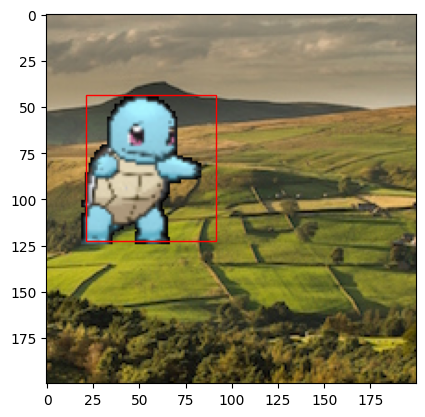

In [ ]:
pokemon_prediction_multiclass()